In [1]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder

In [2]:
os.chdir("C:\\Users\\madhu\\Downloads")

In [3]:
 df=pd.read_csv("cardekho_dataset.csv")

In [4]:
df

,Unnamed: 0,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,0,Maruti Alto,Maruti,Alto,9,120000,Individual,Petrol,Manual,19.70,796,46.30,5,120000
1,1,Hyundai Grand,Hyundai,Grand,5,20000,Individual,Petrol,Manual,18.90,1197,82.00,5,550000
2,2,Hyundai i20,Hyundai,i20,11,60000,Individual,Petrol,Manual,17.00,1197,80.00,5,215000
3,3,Maruti Alto,Maruti,Alto,9,37000,Individual,Petrol,Manual,20.92,998,67.10,5,226000
4,4,Ford Ecosport,Ford,Ecosport,6,30000,Dealer,Diesel,Manual,22.77,1498,98.59,5,570000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15406,19537,Hyundai i10,Hyundai,i10,9,10723,Dealer,Petrol,Manual,19.81,1086,68.05,5,250000
15407,19540,Maruti Ertiga,Maruti,Ertiga,2,18000,Dealer,Petrol,Manual,17.50,1373,91.10,7,925000
15408,19541,Skoda Rapid,Skoda,Rapid,6,67000,Dealer,Diesel,Manual,21.14,1498,103.52,5,425000
15409,19542,Mahindra XUV500,Mahindra,XUV500,5,3800000,Dealer,Diesel,Manual,16.00,2179,140.00,7,1225000


In [5]:
df.shape

(15411, 14)

In [6]:
df.columns

Index(['Unnamed: 0', 'car_name', 'brand', 'model', 'vehicle_age', 'km_driven',
       'seller_type', 'fuel_type', 'transmission_type', 'mileage', 'engine',
       'max_power', 'seats', 'selling_price'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15411 entries, 0 to 15410
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         15411 non-null  int64  
 1   car_name           15411 non-null  object 
 2   brand              15411 non-null  object 
 3   model              15411 non-null  object 
 4   vehicle_age        15411 non-null  int64  
 5   km_driven          15411 non-null  int64  
 6   seller_type        15411 non-null  object 
 7   fuel_type          15411 non-null  object 
 8   transmission_type  15411 non-null  object 
 9   mileage            15411 non-null  float64
 10  engine             15411 non-null  int64  
 11  max_power          15411 non-null  float64
 12  seats              15411 non-null  int64  
 13  selling_price      15411 non-null  int64  
dtypes: float64(2), int64(6), object(6)
memory usage: 1.6+ MB


# DATA CLEANING

In [8]:
df.isnull().sum()

Unnamed: 0           0
car_name             0
brand                0
model                0
vehicle_age          0
km_driven            0
seller_type          0
fuel_type            0
transmission_type    0
mileage              0
engine               0
max_power            0
seats                0
selling_price        0
dtype: int64

FINDING DUPLICATES

In [9]:
df.duplicated().sum()

0

DATA TYPES

In [10]:
df.dtypes

Unnamed: 0             int64
car_name              object
brand                 object
model                 object
vehicle_age            int64
km_driven              int64
seller_type           object
fuel_type             object
transmission_type     object
mileage              float64
engine                 int64
max_power            float64
seats                  int64
selling_price          int64
dtype: object

In [11]:
df['Unnamed: 0'].value_counts()

Unnamed: 0
0        1
13208    1
13103    1
13105    1
13106    1
        ..
6527     1
6528     1
6529     1
6530     1
19543    1
Name: count, Length: 15411, dtype: int64

In [12]:
df['car_name'].value_counts()

car_name
Hyundai i20           906
Maruti Swift Dzire    890
Maruti Swift          781
Maruti Alto           778
Honda City            757
                     ... 
Mercedes-AMG C          1
Tata Altroz             1
Ferrari GTC4Lusso       1
Hyundai Aura            1
Force Gurkha            1
Name: count, Length: 121, dtype: int64

In [13]:
df['brand'].value_counts()

brand
Maruti           4992
Hyundai          2982
Honda            1485
Mahindra         1011
Toyota            793
Ford              790
Volkswagen        620
Renault           536
BMW               439
Tata              430
Mercedes-Benz     337
Skoda             334
Audi              192
Datsun            170
Jaguar             59
Land Rover         51
Jeep               41
Kia                32
Porsche            21
Volvo              20
MG                 19
Mini               17
Nissan             11
Lexus              10
Isuzu               8
Bentley             3
Maserati            2
ISUZU               2
Ferrari             1
Mercedes-AMG        1
Rolls-Royce         1
Force               1
Name: count, dtype: int64

In [14]:
df['model'].value_counts()

model
i20            906
Swift Dzire    890
Swift          781
Alto           778
City           757
              ... 
Ghibli           1
Altroz           1
GTC4Lusso        1
Aura             1
Gurkha           1
Name: count, Length: 120, dtype: int64

In [15]:
df['vehicle_age'].value_counts()

vehicle_age
4     2252
5     2117
3     1926
6     1924
7     1438
8     1282
2     1145
9     1027
10     710
11     551
12     293
13     237
1      221
14     129
15      90
16      25
17      17
18      11
19       5
0        5
21       3
29       1
22       1
25       1
Name: count, dtype: int64

In [16]:
df['km_driven'].value_counts()

km_driven
50000      553
40000      477
70000      466
60000      449
30000      363
          ... 
64705        1
51930        1
5200         1
36977        1
3800000      1
Name: count, Length: 3688, dtype: int64

In [17]:
df['seller_type'].value_counts()

seller_type
Dealer              9539
Individual          5699
Trustmark Dealer     173
Name: count, dtype: int64

In [18]:
df['fuel_type'].value_counts()

fuel_type
Petrol      7643
Diesel      7419
CNG          301
LPG           44
Electric       4
Name: count, dtype: int64

In [19]:
df['transmission_type'].value_counts()

transmission_type
Manual       12225
Automatic     3186
Name: count, dtype: int64

In [20]:
df['mileage'].value_counts()

mileage
18.90    632
18.60    404
17.00    339
24.30    292
28.40    279
        ... 
7.94       1
10.60      1
12.39      1
6.00       1
13.53      1
Name: count, Length: 411, dtype: int64

In [21]:
df['engine'].value_counts()

engine
1197    2436
1248    1668
998     1174
1498    1095
2179     669
        ... 
3598       1
3628       1
1330       1
3855       1
4163       1
Name: count, Length: 110, dtype: int64

In [22]:
df['max_power'].value_counts()

max_power
74.00     791
88.50     589
81.80     544
98.60     424
67.04     390
         ... 
450.00      1
258.81      1
459.00      1
151.89      1
177.01      1
Name: count, Length: 342, dtype: int64

In [23]:
df['seats'].value_counts()

seats
5    12910
7     1922
8      311
6      127
4       77
9       55
2        7
0        2
Name: count, dtype: int64

In [24]:
df['selling_price'].value_counts()

selling_price
450000     357
550000     334
650000     330
350000     320
500000     271
          ... 
117000       1
1064000      1
1472000      1
326000       1
456000       1
Name: count, Length: 1086, dtype: int64

CHANGE DATA TYPE FOR COLUMNS

In [25]:
df=df.rename(columns={"Unnamed: 0":"named"})

In [26]:
df

,named,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,0,Maruti Alto,Maruti,Alto,9,120000,Individual,Petrol,Manual,19.70,796,46.30,5,120000
1,1,Hyundai Grand,Hyundai,Grand,5,20000,Individual,Petrol,Manual,18.90,1197,82.00,5,550000
2,2,Hyundai i20,Hyundai,i20,11,60000,Individual,Petrol,Manual,17.00,1197,80.00,5,215000
3,3,Maruti Alto,Maruti,Alto,9,37000,Individual,Petrol,Manual,20.92,998,67.10,5,226000
4,4,Ford Ecosport,Ford,Ecosport,6,30000,Dealer,Diesel,Manual,22.77,1498,98.59,5,570000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15406,19537,Hyundai i10,Hyundai,i10,9,10723,Dealer,Petrol,Manual,19.81,1086,68.05,5,250000
15407,19540,Maruti Ertiga,Maruti,Ertiga,2,18000,Dealer,Petrol,Manual,17.50,1373,91.10,7,925000
15408,19541,Skoda Rapid,Skoda,Rapid,6,67000,Dealer,Diesel,Manual,21.14,1498,103.52,5,425000
15409,19542,Mahindra XUV500,Mahindra,XUV500,5,3800000,Dealer,Diesel,Manual,16.00,2179,140.00,7,1225000


In [27]:
df.shape

(15411, 14)

NUMERICAL COLUMNS OUTLIER DETECTION

In [28]:
df.describe()

,named,vehicle_age,km_driven,mileage,engine,max_power,seats,selling_price
count,15411.000000,15411.000000,1.541100e+04,15411.000000,15411.000000,15411.000000,15411.000000,1.541100e+04
mean,9811.857699,6.036338,5.561648e+04,19.701151,1486.057751,100.588254,5.325482,7.749711e+05
std,5643.418542,3.013291,5.161855e+04,4.171265,521.106696,42.972979,0.807628,8.941284e+05
min,0.000000,0.000000,1.000000e+02,4.000000,793.000000,38.400000,0.000000,4.000000e+04
25%,4906.500000,4.000000,3.000000e+04,17.000000,1197.000000,74.000000,5.000000,3.850000e+05
50%,9872.000000,6.000000,5.000000e+04,19.670000,1248.000000,88.500000,5.000000,5.560000e+05
75%,14668.500000,8.000000,7.000000e+04,22.700000,1582.000000,117.300000,5.000000,8.250000e+05
max,19543.000000,29.000000,3.800000e+06,33.540000,6592.000000,626.000000,9.000000,3.950000e+07


# CHECK OUTLIERS

NAMED

<Axes: xlabel='named'>

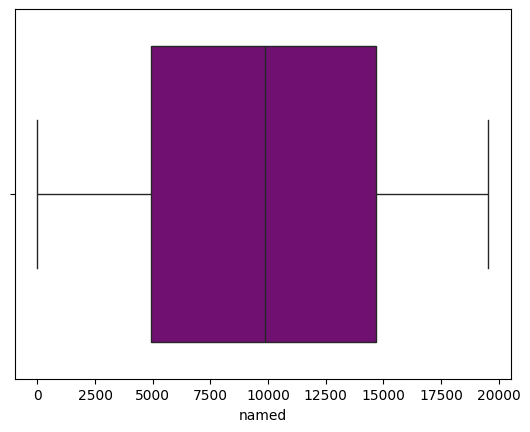

In [29]:
sns.boxplot(data=df,x='named',color='purple')

In [30]:
q1,q3=np.percentile(df["named"],[25,75])
IQR=q3-q1
upper=q3+1.5*IQR
lower=q1-1.5*IQR
print("Upper age bound:",upper,"Lower age bound :", lower)

Upper age bound: 29311.5 Lower age bound : -9736.5


In [31]:
df.named.describe()

count    15411.000000
mean      9811.857699
std       5643.418542
min          0.000000
25%       4906.500000
50%       9872.000000
75%      14668.500000
max      19543.000000
Name: named, dtype: float64

VEHICLE_AGE

<Axes: xlabel='vehicle_age'>

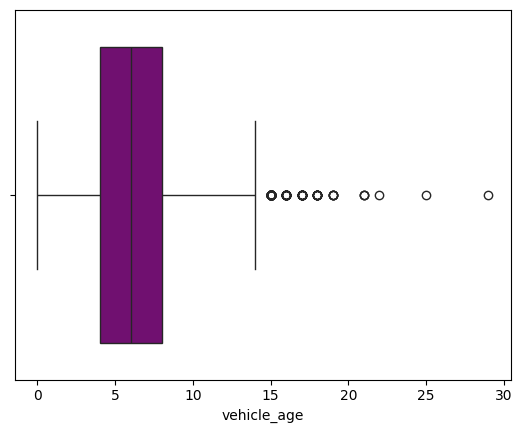

In [32]:
sns.boxplot(data=df,x='vehicle_age',color='purple')

In [33]:
q1,q3=np.percentile(df["vehicle_age"],[25,75])
IQR=q3-q1
upper=q3+1.5*IQR
lower=q1-1.5*IQR
print("Upper age bound:",upper,"Lower age bound :", lower)

Upper age bound: 14.0 Lower age bound : -2.0


In [34]:
df.vehicle_age=df.vehicle_age.clip(14.0,-2.0)

In [35]:
df.vehicle_age.describe()

count    15411.000000
mean         6.015898
std          2.945504
min          0.000000
25%          4.000000
50%          6.000000
75%          8.000000
max         14.000000
Name: vehicle_age, dtype: float64

<Axes: xlabel='vehicle_age'>

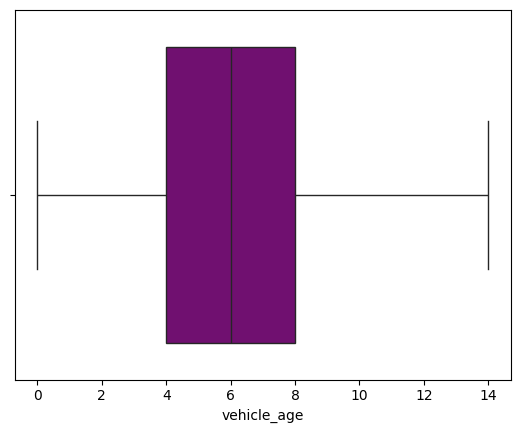

In [36]:
sns.boxplot(data=df,x='vehicle_age',color='purple')

KM_DRIVEN

<Axes: xlabel='km_driven'>

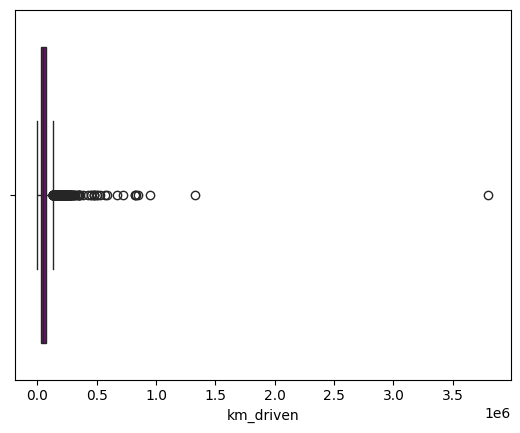

In [37]:
sns.boxplot(data=df,x='km_driven',color='purple')

In [38]:
q1,q3=np.percentile(df["km_driven"],[25,75])
IQR=q3-q1
upper=q3+1.5*IQR
lower=q1-1.5*IQR
print("Upper age bound:",upper,"Lower age bound :", lower)

Upper age bound: 130000.0 Lower age bound : -30000.0


In [39]:
df.km_driven=df.km_driven.clip(130000.0,-30000.0)

In [40]:
df.km_driven.describe()

count     15411.000000
mean      53486.354552
std       30980.976235
min         100.000000
25%       30000.000000
50%       50000.000000
75%       70000.000000
max      130000.000000
Name: km_driven, dtype: float64

<Axes: xlabel='km_driven'>

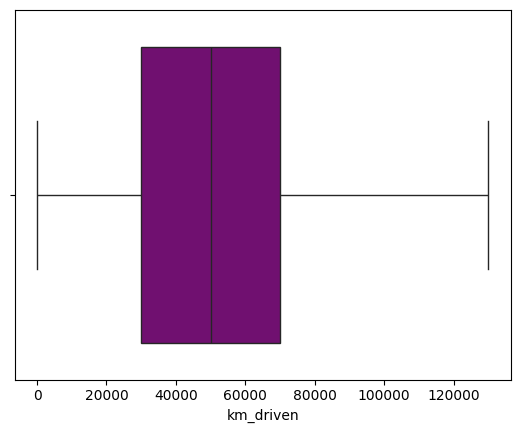

In [41]:
sns.boxplot(data=df,x='km_driven',color='purple')

MILEAGE

<Axes: xlabel='mileage'>

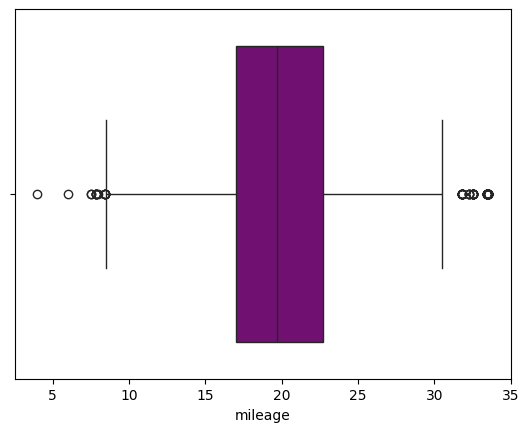

In [42]:
sns.boxplot(data=df,x='mileage',color='purple')

In [43]:
q1,q3=np.percentile(df["mileage"],[25,75])
IQR=q3-q1
upper=q3+1.5*IQR
lower=q1-1.5*IQR
print("Upper age bound:",upper,"Lower age bound :", lower)

Upper age bound: 31.25 Lower age bound : 8.450000000000001


In [44]:
df.mileage=df.mileage.clip(31.25,8.450000000000001)

In [45]:
df.mileage.describe()

count    15411.000000
mean        19.694555
std          4.146287
min          8.450000
25%         17.000000
50%         19.670000
75%         22.700000
max         31.250000
Name: mileage, dtype: float64

<Axes: xlabel='mileage'>

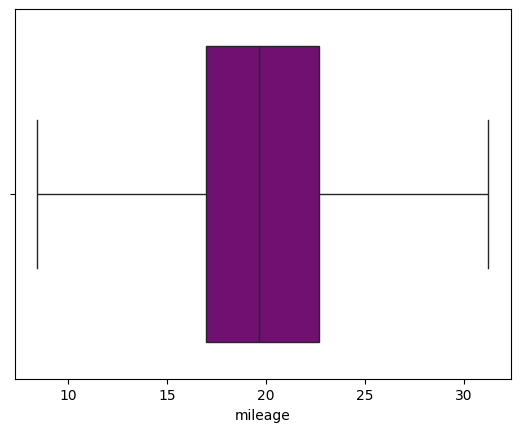

In [46]:
sns.boxplot(data=df,x='mileage',color='purple')

ENGINE

<Axes: xlabel='engine'>

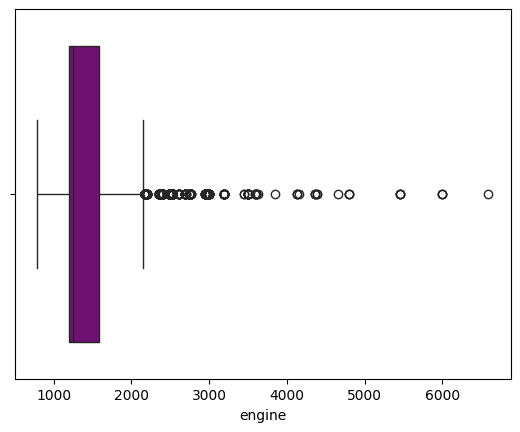

In [47]:
sns.boxplot(data=df,x='engine',color='purple')

In [48]:
q1,q3=np.percentile(df["engine"],[25,75])
IQR=q3-q1
upper=q3+1.5*IQR
lower=q1-1.5*IQR
print("Upper age bound:",upper,"Lower age bound :", lower)

Upper age bound: 2159.5 Lower age bound : 619.5


In [49]:
df.engine=df.engine.clip(2159.5,619.5)

In [50]:
df.engine.describe()

count    15411.000000
mean      1433.298942
std        393.691136
min        793.000000
25%       1197.000000
50%       1248.000000
75%       1582.000000
max       2159.500000
Name: engine, dtype: float64

<Axes: xlabel='engine'>

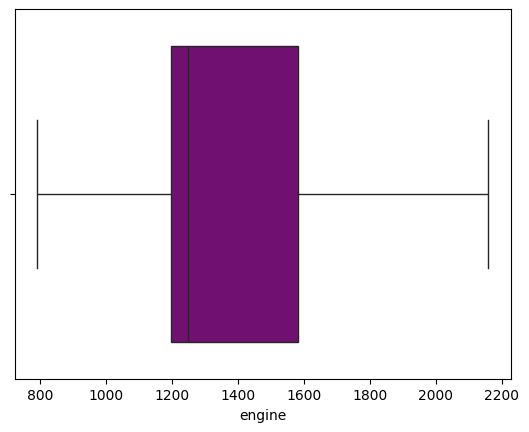

In [51]:
sns.boxplot(data=df,x='engine',color='purple')

MAX_POWER

<Axes: xlabel='max_power'>

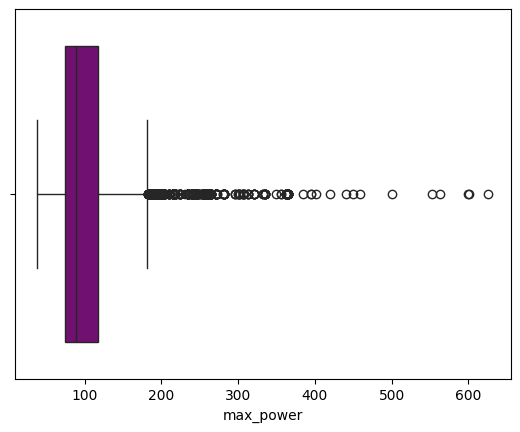

In [52]:
sns.boxplot(data=df,x='max_power',color='purple')

In [53]:
q1,q3=np.percentile(df["max_power"],[25,75])
IQR=q3-q1
upper=q3+1.5*IQR
lower=q1-1.5*IQR
print("Upper age bound:",upper,"Lower age bound :", lower)

Upper age bound: 182.25 Lower age bound : 9.050000000000011


In [54]:
df.max_power=df.max_power.clip(182.25,9.050000000000011)

<Axes: xlabel='max_power'>

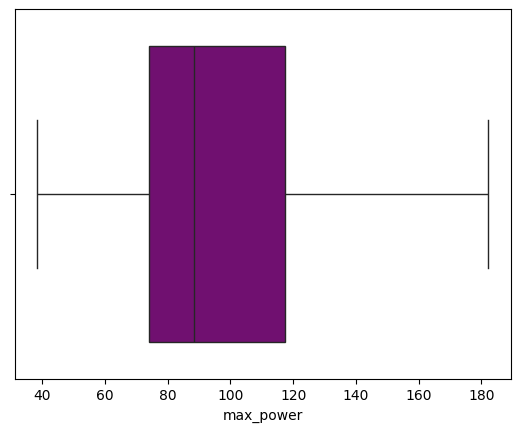

In [55]:
sns.boxplot(data=df,x='max_power',color='purple')

SEATS

<Axes: xlabel='seats'>

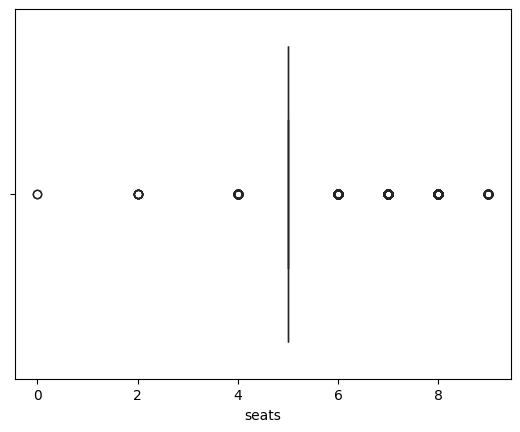

In [56]:
sns.boxplot(data=df,x='seats',color='purple')

In [57]:
q1,q3=np.percentile(df["seats"],[25,75])
IQR=q3-q1
upper=q3+1.5*IQR
lower=q1-1.5*IQR
print("Upper age bound:",upper,"Lower age bound :", lower)

Upper age bound: 5.0 Lower age bound : 5.0


In [58]:
df.seats=df.seats.clip(5.0,5.0)

<Axes: xlabel='seats'>

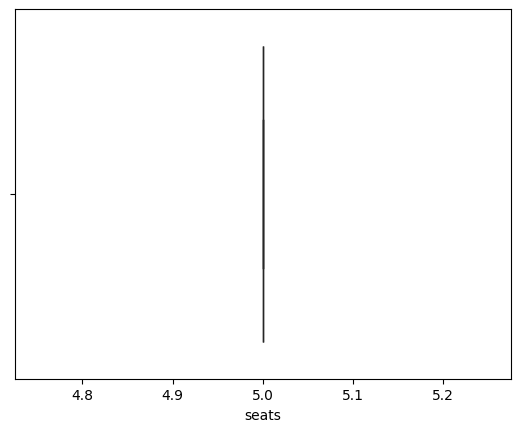

In [59]:
sns.boxplot(data=df,x='seats',color='green')

SELLING_PRICE

<Axes: xlabel='selling_price'>

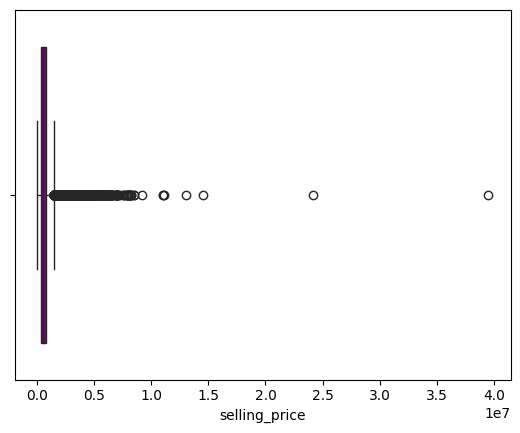

In [60]:
sns.boxplot(data=df,x='selling_price',color='purple')

In [61]:
q1,q3=np.percentile(df["selling_price"],[25,75])
IQR=q3-q1
upper=q3+1.5*IQR
lower=q1-1.5*IQR
print("Upper age bound:",upper,"Lower age bound :", lower)

Upper age bound: 1485000.0 Lower age bound : -275000.0


In [62]:
df.selling_price=df.selling_price.clip(1485000.0,-275000.0)

<Axes: xlabel='selling_price'>

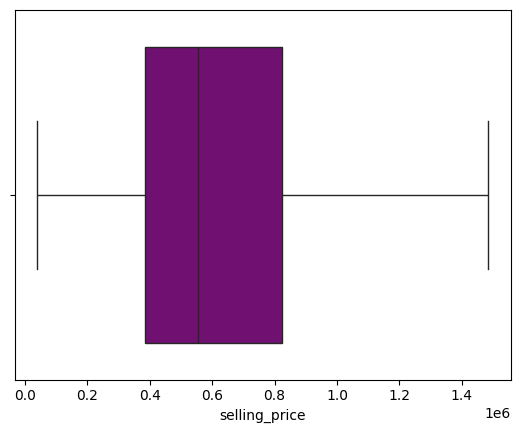

In [63]:
sns.boxplot(data=df,x='selling_price',color='purple')

# EDA 

<Axes: xlabel='brand', ylabel='count'>

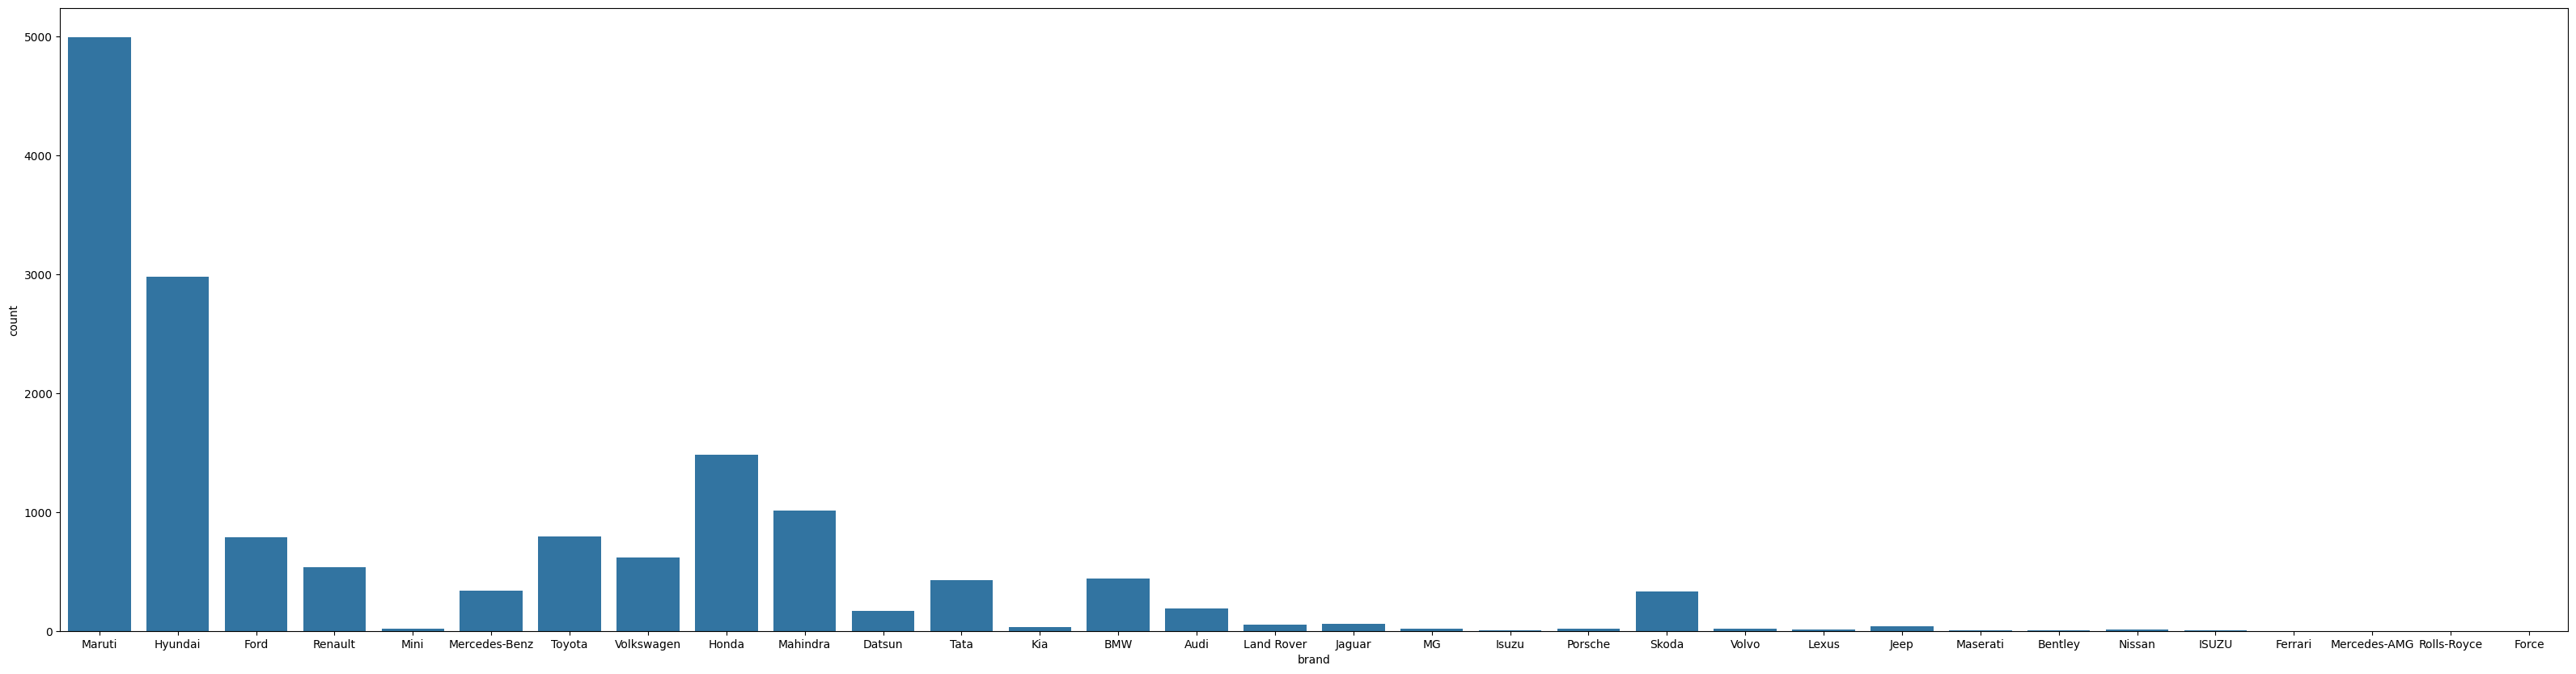

In [64]:
#categorical column

plt.figure(figsize=(40,10))
sns.countplot(df,x ="brand",stat="count")

<Axes: xlabel='brand', ylabel='selling_price'>

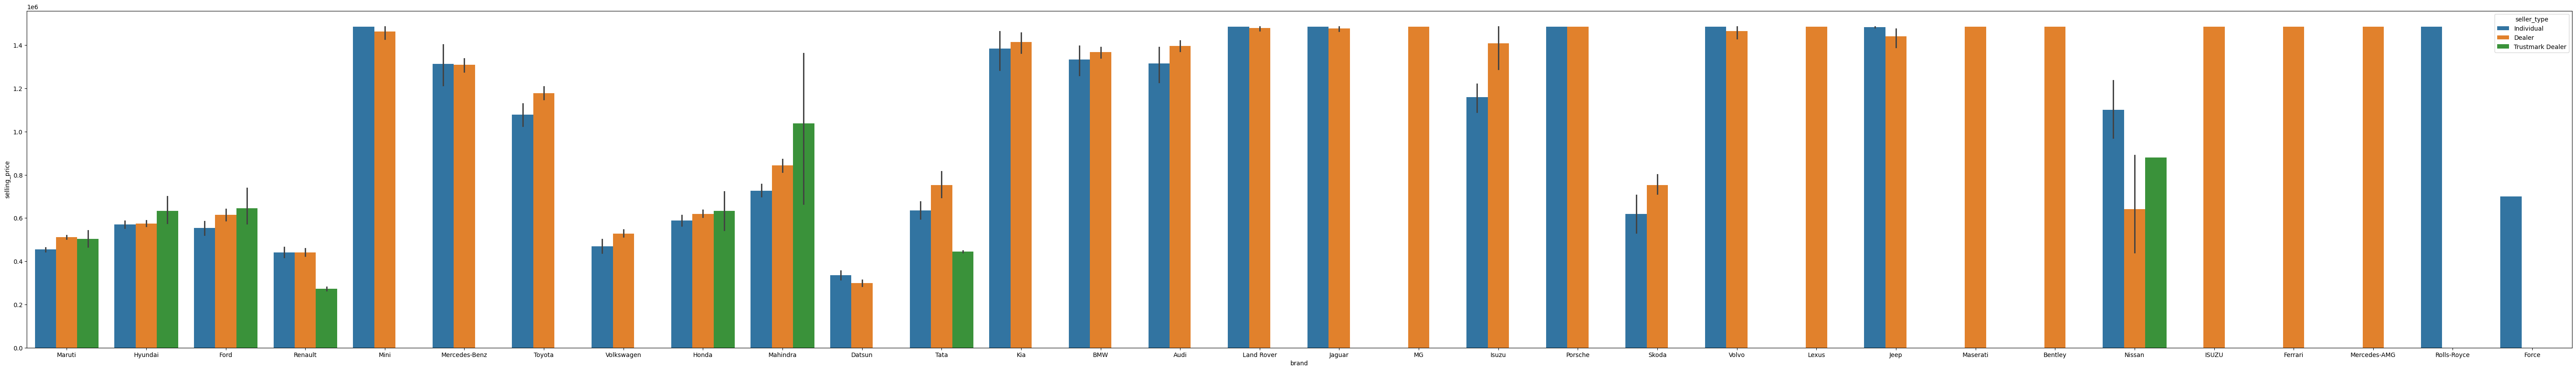

In [65]:
#categorical vs numerical
plt.figure(figsize=(75,10))

sns.barplot(df, x="brand", y="selling_price",hue="seller_type")

<Axes: xlabel='brand', ylabel='selling_price'>

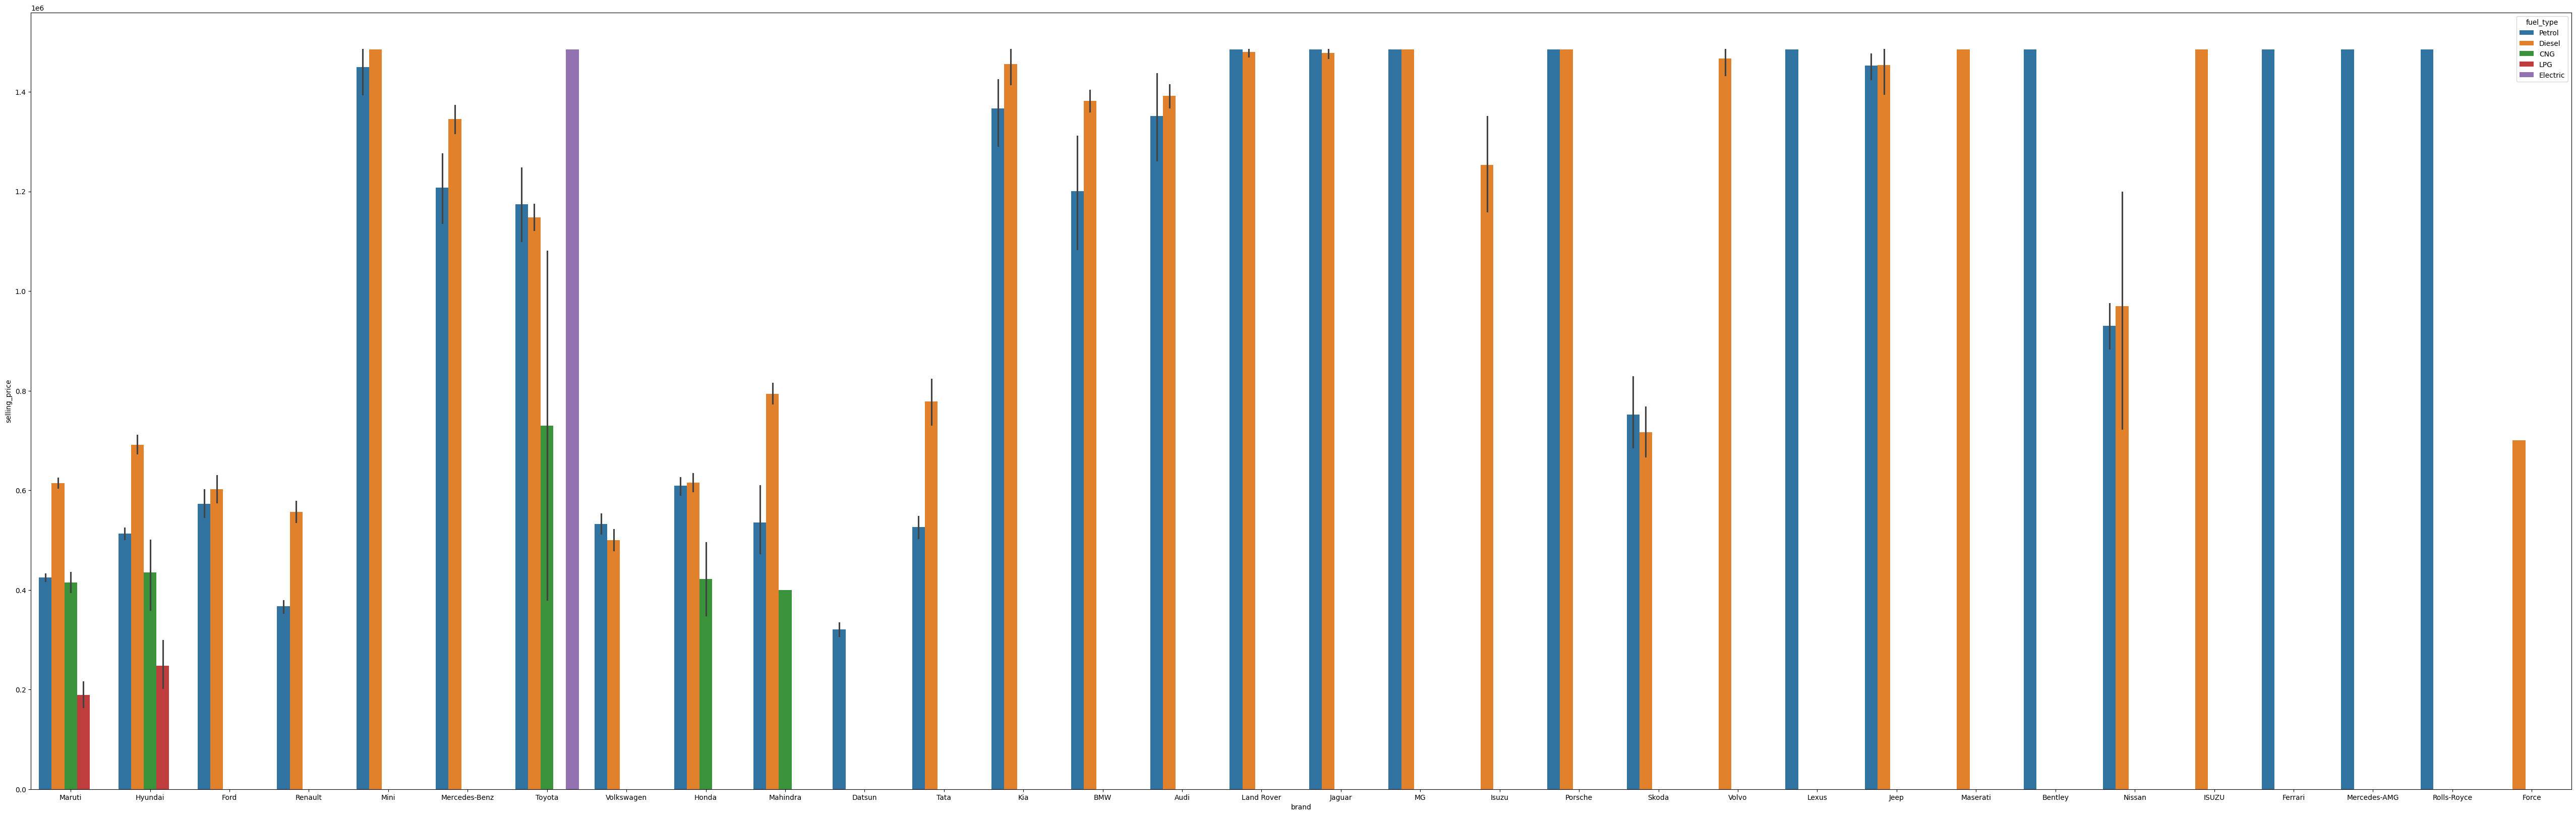

In [66]:
plt.figure(figsize=(65,20))

sns.barplot(df,x="brand",y="selling_price",hue="fuel_type")

<Axes: xlabel='brand', ylabel='selling_price'>

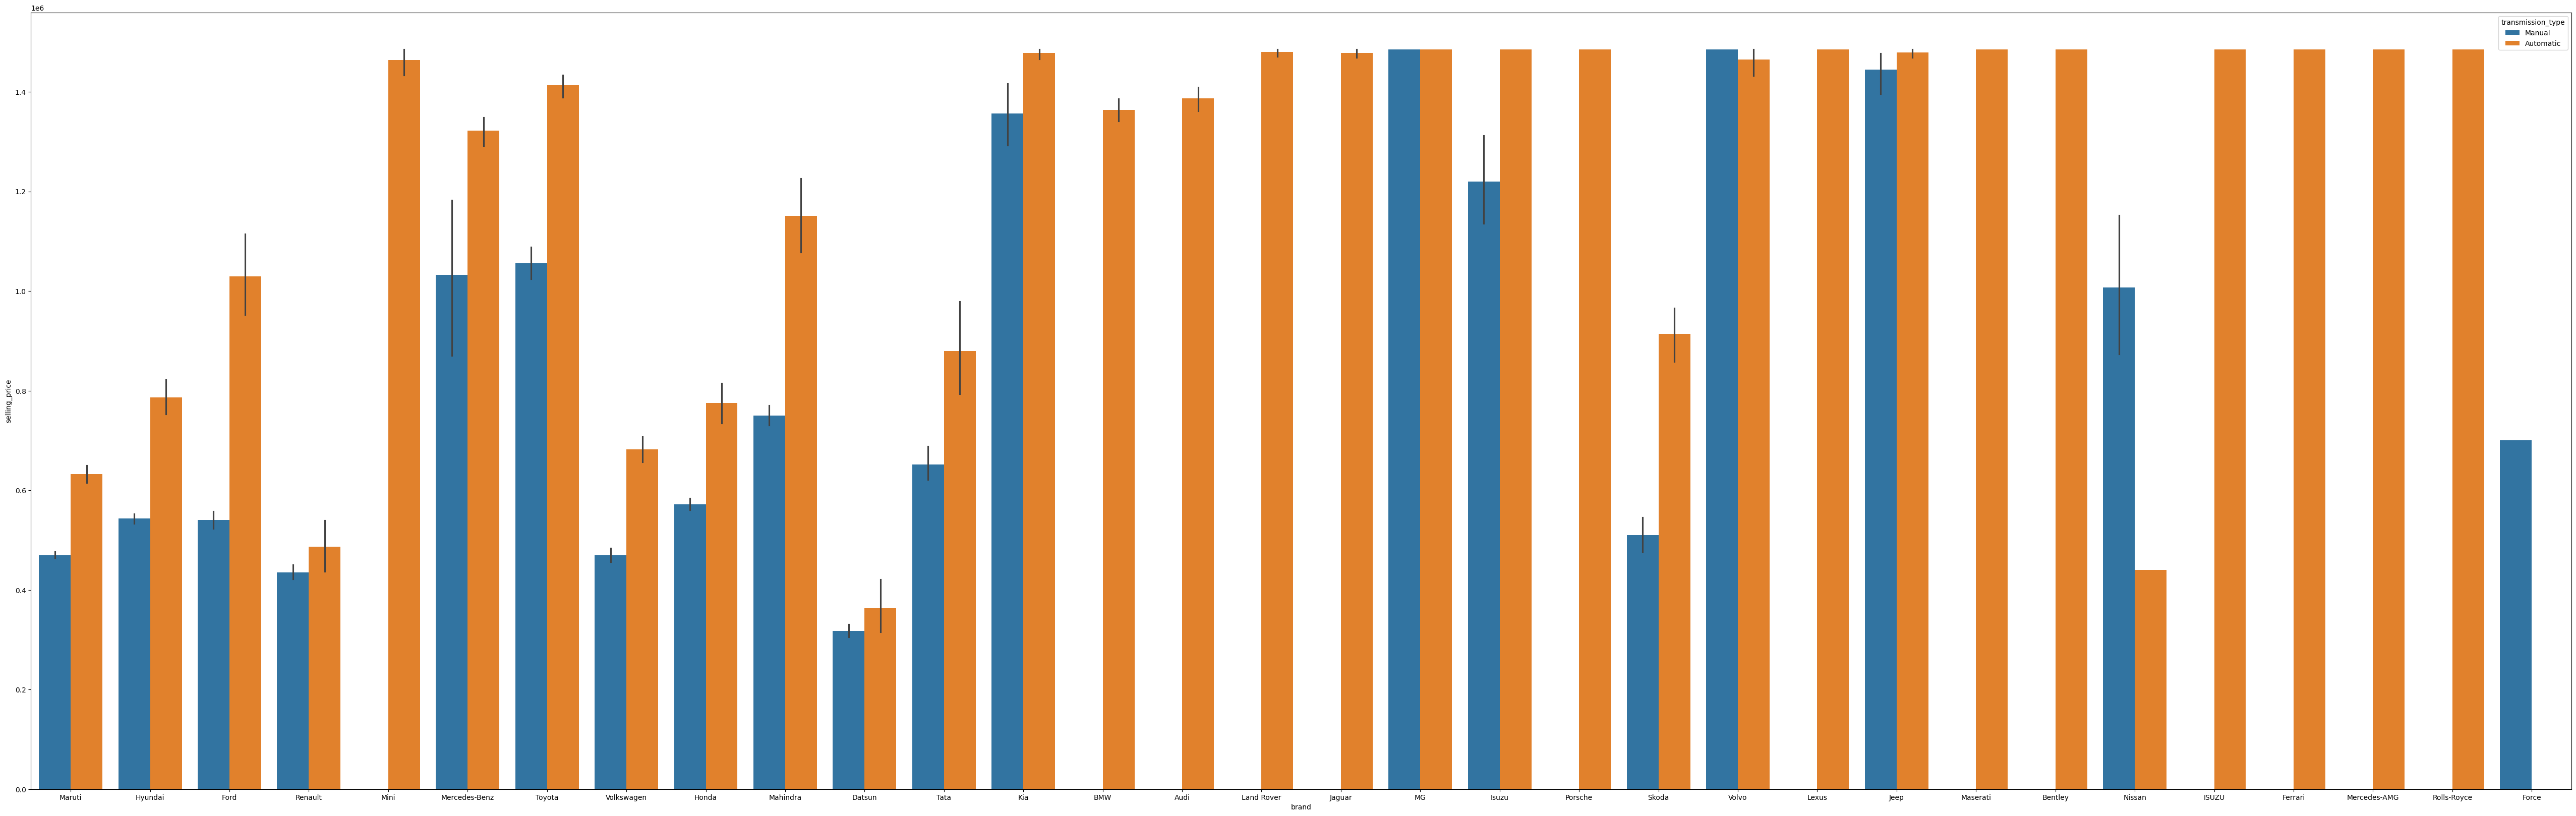

In [67]:
plt.figure(figsize=(65,20))

sns.barplot(df,x="brand",y="selling_price",hue="transmission_type")

<Axes: xlabel='mileage', ylabel='Count'>

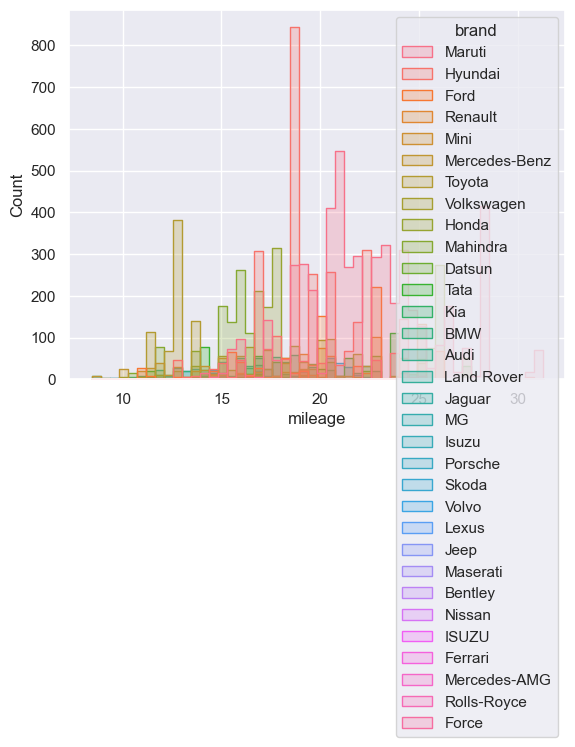

In [68]:
sns.set_theme(style='darkgrid',palette='pastel')
sns.histplot(data=df, x="mileage", hue="brand", element="step")

<Axes: xlabel='engine', ylabel='km_driven'>

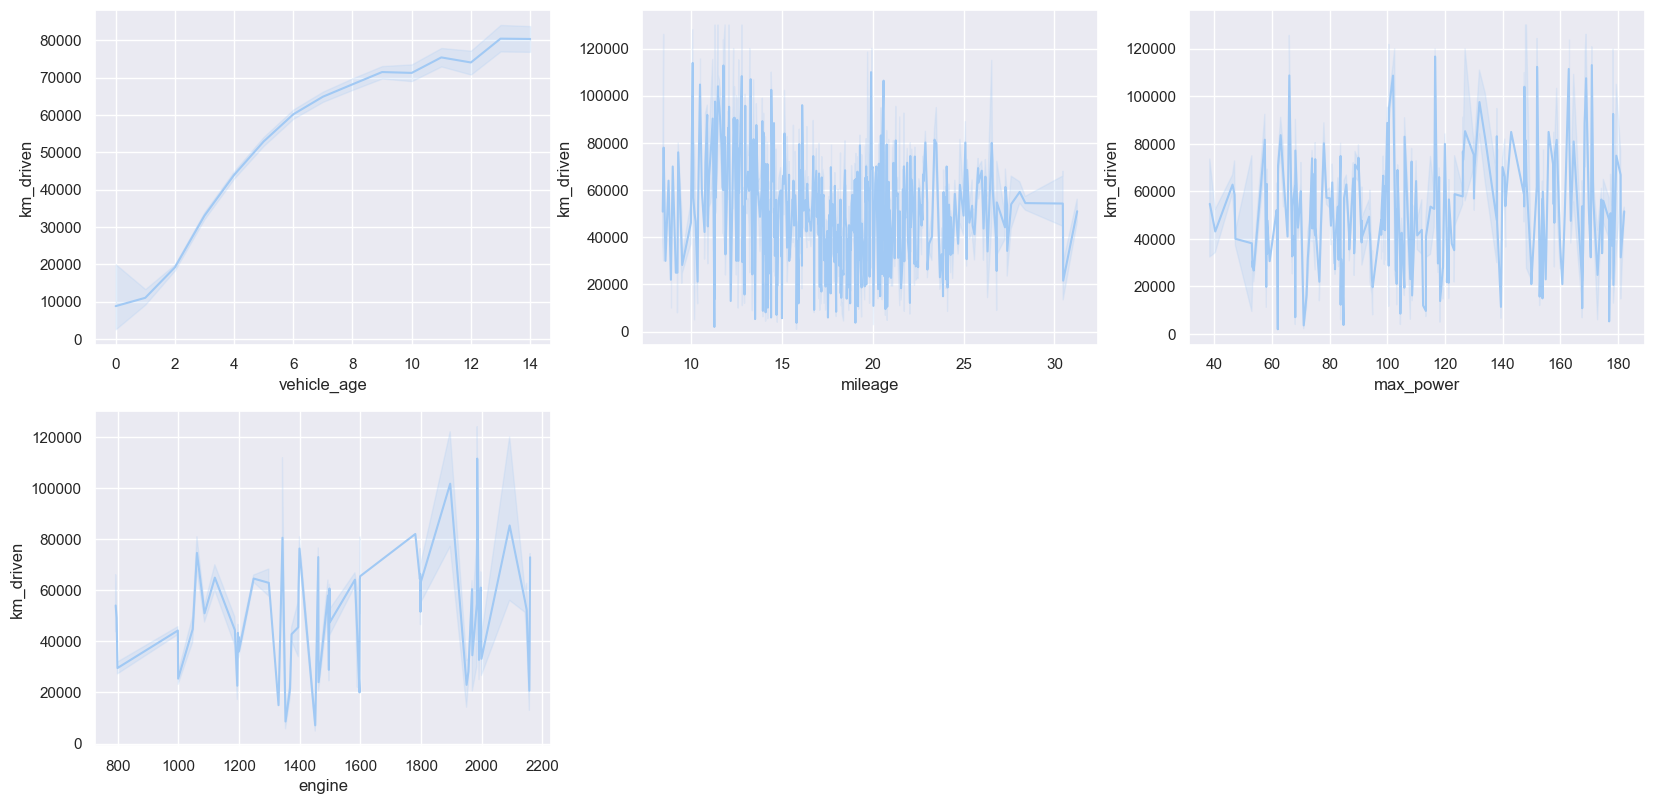

In [69]:
plt.figure(figsize=(20,20))
plt.subplot(431)
sns.lineplot(data=df,x="vehicle_age",y="km_driven")

plt.subplot(432)
sns.lineplot(data=df,x="mileage",y="km_driven")

plt.subplot(433)
sns.lineplot(data=df,x="max_power",y="km_driven")

plt.subplot(434)
sns.lineplot(data=df,x="engine",y="km_driven")

<Axes: xlabel='engine', ylabel='mileage'>

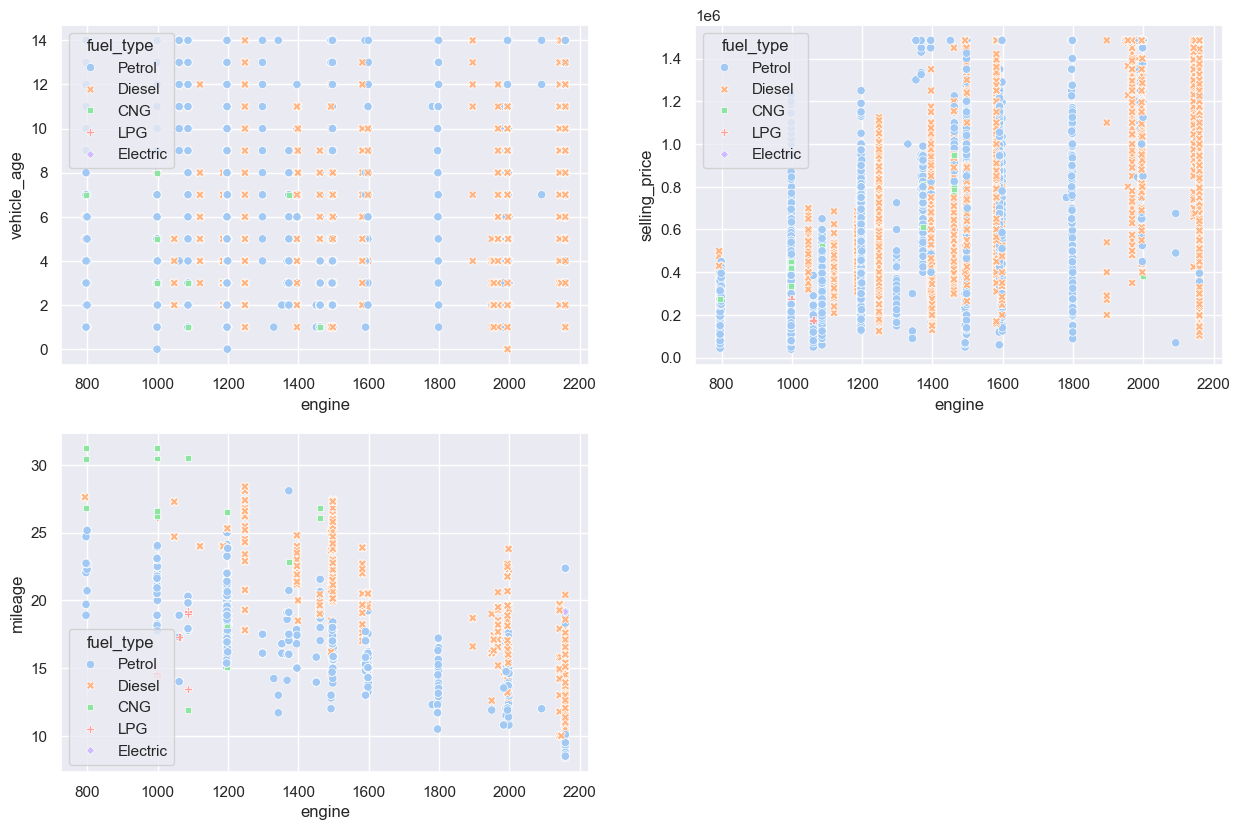

In [70]:
plt.figure(figsize=(15,15))
plt.subplot(321)
sns.scatterplot(data=df, x="engine", y="vehicle_age",hue="fuel_type",style="fuel_type")
 
plt.subplot(322)
sns.scatterplot(data=df,x="engine",y="selling_price",hue="fuel_type",style="fuel_type")

plt.subplot(323)
sns.scatterplot(data=df,x="engine",y="mileage",hue="fuel_type",style="fuel_type")

# ENCODING

In [71]:
#just removing unwanted columns 
df.drop(labels=["car_name","brand","model","seats"],axis=1,inplace=True)
df

,named,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,selling_price
0,0,9,120000,Individual,Petrol,Manual,19.70,796.0,46.30,120000
1,1,5,20000,Individual,Petrol,Manual,18.90,1197.0,82.00,550000
2,2,11,60000,Individual,Petrol,Manual,17.00,1197.0,80.00,215000
3,3,9,37000,Individual,Petrol,Manual,20.92,998.0,67.10,226000
4,4,6,30000,Dealer,Diesel,Manual,22.77,1498.0,98.59,570000
...,...,...,...,...,...,...,...,...,...,...
15406,19537,9,10723,Dealer,Petrol,Manual,19.81,1086.0,68.05,250000
15407,19540,2,18000,Dealer,Petrol,Manual,17.50,1373.0,91.10,925000
15408,19541,6,67000,Dealer,Diesel,Manual,21.14,1498.0,103.52,425000
15409,19542,5,130000,Dealer,Diesel,Manual,16.00,2159.5,140.00,1225000


In [72]:
#converting categorical into numerical using OneHotEncoder
df=pd.get_dummies(df,dtype=float)
df

,named,vehicle_age,km_driven,mileage,engine,max_power,selling_price,seller_type_Dealer,seller_type_Individual,seller_type_Trustmark Dealer,fuel_type_CNG,fuel_type_Diesel,fuel_type_Electric,fuel_type_LPG,fuel_type_Petrol,transmission_type_Automatic,transmission_type_Manual
0,0,9,120000,19.70,796.0,46.30,120000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,1,5,20000,18.90,1197.0,82.00,550000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2,2,11,60000,17.00,1197.0,80.00,215000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3,3,9,37000,20.92,998.0,67.10,226000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
4,4,6,30000,22.77,1498.0,98.59,570000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15406,19537,9,10723,19.81,1086.0,68.05,250000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
15407,19540,2,18000,17.50,1373.0,91.10,925000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
15408,19541,6,67000,21.14,1498.0,103.52,425000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
15409,19542,5,130000,16.00,2159.5,140.00,1225000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [73]:
df.dtypes

named                             int64
vehicle_age                       int64
km_driven                         int64
mileage                         float64
engine                          float64
max_power                       float64
selling_price                     int64
seller_type_Dealer              float64
seller_type_Individual          float64
seller_type_Trustmark Dealer    float64
fuel_type_CNG                   float64
fuel_type_Diesel                float64
fuel_type_Electric              float64
fuel_type_LPG                   float64
fuel_type_Petrol                float64
transmission_type_Automatic     float64
transmission_type_Manual        float64
dtype: object

# MACHINE LEARNING

In [74]:
x=df.drop('selling_price',axis=1)      # Feature Matrix
x

,named,vehicle_age,km_driven,mileage,engine,max_power,seller_type_Dealer,seller_type_Individual,seller_type_Trustmark Dealer,fuel_type_CNG,fuel_type_Diesel,fuel_type_Electric,fuel_type_LPG,fuel_type_Petrol,transmission_type_Automatic,transmission_type_Manual
0,0,9,120000,19.70,796.0,46.30,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,1,5,20000,18.90,1197.0,82.00,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2,2,11,60000,17.00,1197.0,80.00,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3,3,9,37000,20.92,998.0,67.10,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
4,4,6,30000,22.77,1498.0,98.59,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15406,19537,9,10723,19.81,1086.0,68.05,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
15407,19540,2,18000,17.50,1373.0,91.10,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
15408,19541,6,67000,21.14,1498.0,103.52,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
15409,19542,5,130000,16.00,2159.5,140.00,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [75]:
y=df['selling_price']   #Target Matrix
y

0         120000
1         550000
2         215000
3         226000
4         570000
          ...   
15406     250000
15407     925000
15408     425000
15409    1225000
15410    1200000
Name: selling_price, Length: 15411, dtype: int64

In [76]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [77]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor, RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, explained_variance_score, r2_score

In [78]:
models = [ LinearRegression, SVR, DecisionTreeRegressor, RandomForestRegressor]
mse = []
rmse = []
evs = []
r_square_score = []

for model in models:
    regressor = model().fit(x_train, y_train)
    pred = regressor.predict(x_test)
    mse.append(mean_squared_error(y_true= y_test, y_pred= pred))
    rmse.append(np.sqrt(mean_squared_error(y_true= y_test, y_pred= pred)))
    evs.append(explained_variance_score(y_true= y_test, y_pred= pred))
    r_square_score.append(r2_score(y_true= y_test, y_pred= pred))

In [79]:
ML_model_df=pd.DataFrame({"Model":[ 'Linear Regression', 'Support Vector Rregression', 'Decision Tree Regressor',\
                                   'Random Forest Regressor'],
                         "Mean Squarred Error":mse,
                         "Root Mean Squarred Error":rmse,
                         "Explained Variance Score":evs,
                         "R-Sqaure Score(Accuracy)":r_square_score})

ML_model_df.set_index('Model',inplace=True)
ML_model_df

,Mean Squarred Error,Root Mean Squarred Error,Explained Variance Score,R-Sqaure Score(Accuracy)
Model,,,,
Linear Regression,2.151009e+10,146663.188980,0.844265,0.844262
Support Vector Rregression,1.507912e+11,388318.435406,0.000238,-0.091764
Decision Tree Regressor,1.445559e+10,120231.387786,0.895368,0.895338
Random Forest Regressor,7.575316e+09,87036.290146,0.945154,0.945153


In [80]:
from sklearn.ensemble import ExtraTreesRegressor

model = ExtraTreesRegressor()
model.fit(x,y)

ExtraTreesRegressor()

In [81]:
print(model.feature_importances_)

[1.96691909e-02 1.99804981e-01 2.45718455e-02 2.52460864e-02
 1.97287047e-01 4.12013794e-01 3.02550284e-03 3.30550769e-03
 1.27944777e-04 2.84007989e-04 1.96055771e-02 3.36849680e-06
 9.23473475e-06 6.20066467e-03 5.22326323e-02 3.66126140e-02]


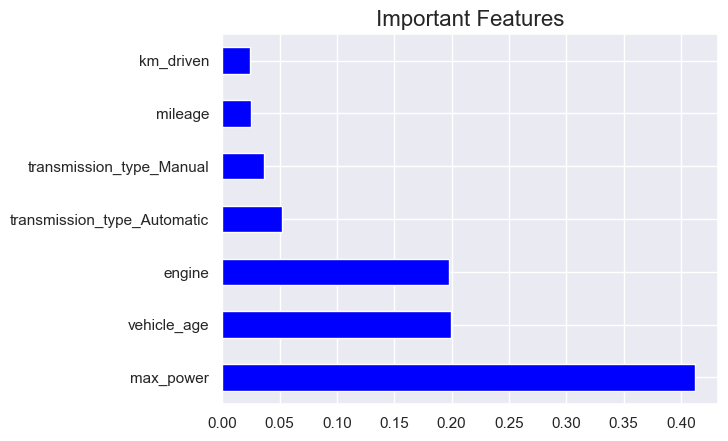

In [82]:
imp_feature = pd.Series(model.feature_importances_, index = x.columns)
imp_feature.nlargest(7).plot(kind = 'barh', color='blue')
plt.title('Important Features', fontsize=16)
plt.show()